Chelsea Jaculina

DATA 255 Assignment #3

September 29, 2025

## Import Required Libraries

In [236]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Libraries

In [237]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries successfully loaded")

Libraries successfully loaded


## Load Data

In [238]:
def load_data(path):
    data = pd.read_csv(path).values
    X = data[:, 1:] / 255.0  # Normalize pixel values
    y = data[:, 0].reshape(-1, 1)
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

X_train, y_train = load_data("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_train_binary.csv")
X_test, y_test = load_data("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_test_binary.csv")

print(f"Loaded {len(X_train)} training samples successfully")
print(f"Loaded {len(X_test)} test samples successfully")


Loaded 11339 training samples successfully
Loaded 1850 test samples successfully


## 1. Build Deep Neural Network

Define Activation Functions

In [239]:
def relu(z):
    return torch.maximum(torch.tensor(0.0), z)

def relu_derivative(z):
    return (z > 0).float()

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

print("Activation functions successfully defined")

Activation functions successfully defined



Define Intializations

In [240]:
input_size = 784
hidden_size = 100
output_size = 1

torch.manual_seed(0)  # For reproducibility

# He Initialization for ReLU hidden layer
w1 = torch.randn((input_size, hidden_size), dtype=torch.float32, requires_grad=True) * (
    (2 ** 0.5) / ((input_size + hidden_size) ** 0.5)
)
# Xavier Initialization for Sigmoid output layer
w2 = torch.randn((hidden_size, output_size), dtype=torch.float32, requires_grad=True) * (
    2 / ((hidden_size + output_size) ** 0.5)
)
# Biases
b1 = torch.zeros((hidden_size,), dtype=torch.float32, requires_grad=True)
b2 = torch.zeros((output_size,), dtype=torch.float32, requires_grad=True)

print("Initializations successfully defined")

Initializations successfully defined


Define Binary Cross Entropy Loss and Accuracy Functions from scratch

In [241]:
def binary_cross_entropy(y_pred, y_true):
    epsilon = 1e-8
    return -torch.mean(y_true * torch.log(y_pred + epsilon) + (1 - y_true) * torch.log(1 - y_pred + epsilon))

def accuracy(y_pred, y_true):
    preds = (y_pred >= 0.5).float()
    return (preds == y_true).float().mean().item()

print("Loss and accuracy functions successfully defined")

Loss and accuracy functions successfully defined


Define Forward Pass from scratch

In [242]:
def forward_pass(X):
    z1 = X @ w1 + b1
    a1 = relu(z1)
    z2 = a1 @ w2 + b2
    y_pred = sigmoid(z2)
    return z1, a1, z2, y_pred

print("Forward pass function successfully defined")

Forward pass function successfully defined


## 2. Define Backward Propagation

Implement backward propagation from scratch to calculate gradient

The gradient would be used to update the parameters using gradient descent method

In [243]:
def backward_pass(X, y, z1, a1, y_pred):
    # gradient of loss w.r.t. output layer pre-activation (z2)
    dz2 = y_pred - y

    # gradients for weights and bias of output layer
    dw2 = a1.T @ dz2 / X.shape[0]
    db2 = dz2.mean(0)

    # backpropagate into hidden layer
    da1 = dz2 @ w2.T
    dz1 = da1 * relu_derivative(z1)

    # gradients for weights and bias of hidden layer
    dw1 = X.T @ dz1 / X.shape[0]
    db1 = dz1.mean(0)

    return dw1, db1, dw2, db2

print("Backward pass function successfully defined")

Backward pass function successfully defined


# 3. Training


Define learning rate and # of epochs


In [244]:
lr = 0.2
epochs = 20
train_accs, test_accs = [], []

print("Hyperparameters successfully defined")

Hyperparameters successfully defined


Train the neural network using gradient descent from scratch

Print accuracy for training and testing set for at least 5 different epochs

In [245]:
for epoch in range(epochs):
    # Forward pass
    z1, a1, z2, y_pred = forward_pass(X_train)

    # Loss and accuracy
    loss = binary_cross_entropy(y_pred, y_train)
    acc = accuracy(y_pred, y_train)
    train_accs.append(acc)

    # Backward pass
    dw1, db1, dw2, db2 = backward_pass(X_train, y_train, z1, a1, y_pred)

    # Update weights and biases
    w1.data -= lr * dw1
    b1.data -= lr * db1
    w2.data -= lr * dw2
    b2.data -= lr * db2

    # Evaluate on test set
    _, _, _, y_test_pred = forward_pass(X_test)
    test_acc = accuracy(y_test_pred, y_test)
    test_accs.append(test_acc)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss.item():.2f} | Train Acc: {acc:.2f} | Test Acc: {test_acc:.2f}")


Epoch 1/20 | Loss: 0.71 | Train Acc: 0.49 | Test Acc: 0.84
Epoch 2/20 | Loss: 0.48 | Train Acc: 0.83 | Test Acc: 0.94
Epoch 3/20 | Loss: 0.37 | Train Acc: 0.94 | Test Acc: 0.94
Epoch 4/20 | Loss: 0.30 | Train Acc: 0.94 | Test Acc: 0.95
Epoch 5/20 | Loss: 0.26 | Train Acc: 0.96 | Test Acc: 0.96
Epoch 6/20 | Loss: 0.22 | Train Acc: 0.95 | Test Acc: 0.96
Epoch 7/20 | Loss: 0.20 | Train Acc: 0.96 | Test Acc: 0.96
Epoch 8/20 | Loss: 0.18 | Train Acc: 0.96 | Test Acc: 0.96
Epoch 9/20 | Loss: 0.17 | Train Acc: 0.96 | Test Acc: 0.96
Epoch 10/20 | Loss: 0.16 | Train Acc: 0.96 | Test Acc: 0.96
Epoch 11/20 | Loss: 0.15 | Train Acc: 0.96 | Test Acc: 0.96
Epoch 12/20 | Loss: 0.14 | Train Acc: 0.97 | Test Acc: 0.96
Epoch 13/20 | Loss: 0.14 | Train Acc: 0.97 | Test Acc: 0.97
Epoch 14/20 | Loss: 0.13 | Train Acc: 0.97 | Test Acc: 0.97
Epoch 15/20 | Loss: 0.13 | Train Acc: 0.97 | Test Acc: 0.97
Epoch 16/20 | Loss: 0.12 | Train Acc: 0.97 | Test Acc: 0.97
Epoch 17/20 | Loss: 0.12 | Train Acc: 0.97 | Test

Visualize the output of the model once it is trained

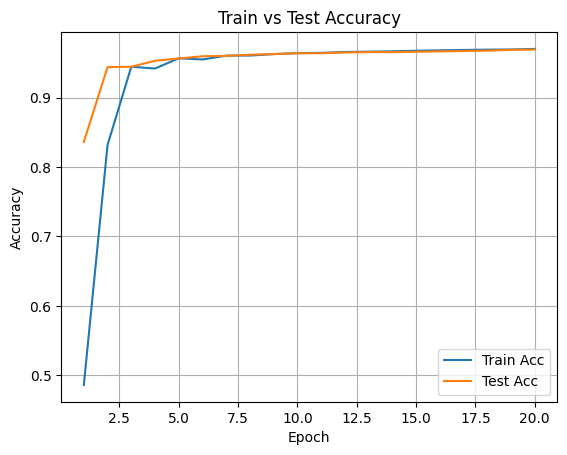

In [246]:
plt.plot(range(1, epochs + 1), train_accs, label="Train Acc")
plt.plot(range(1, epochs + 1), test_accs, label="Test Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()